# DMA Fall '21

In [241]:
NAME = "Yinglu Deng"
COLLABORATORS = ""

---

# Lab 3: Decision Trees

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- Questions can be either autograded and manually graded.
- The type of question and the points they carry are indicated in each question cell
- An autograded question has 3 cells
     - **Question cell** : Read only cell containing the question
     - **Code Cell** : This is where you write the code
     - **Grading cell** : This is where the grading occurs, and **you are required not to edit this cell**
- Manually graded questions only have the question and code cells. **All manually graded questions are explicitly stated**
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out! 
- You can delete the `raise NotImplementedError()` for all questions.
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


## About the dataset
This assignment uses a dataset obtained from the JSE Data Archive that contains biological and self-reported activity traits of a sample of college students at a single university uploaded in 2013. The study associated with these data focused on exploring if a correspondence exists between eye color and and other traits. You will be using gender as the target/label in this lab.

FEATURE DESCRIPTIONS: 
- Color (Blue, Brown, Green, Hazel, Other)
- Age (in years)
- YearinSchool (First, Second, Third, Fourth, Other)
- Height (in inches)
- Miles (distance from home town of student to Ames, IA) 
- Brothers (number of brothers)
- Sisters (number of sisters)
- CompTime (number of hours spent on computer per week)
- Exercise (whether the student exercises Yes or No)
- ExerTime (number of hours spent exercising per week)
- MusicCDs (number of music CDs student owns)
- PlayGames (number of hours spent playing games per week)
- WatchTV (number of hours spent watching TV per week

Background Information on the dataset: http://jse.amstat.org/v21n2/froelich/eyecolorgender.txt 

In [242]:
from collections import Counter, defaultdict
from itertools import combinations 
import pandas as pd
import numpy as np
import operator
import math
import itertools
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing, tree
import matplotlib.pyplot as plt


!wget -nc http://askoski.berkeley.edu/~zp/eye_color.csv
!ls
df = pd.read_csv('eye_color.csv')
# remove NA's and reset the index
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df = df.reset_index(drop=True)

df.head()

File ‘eye_color.csv’ already there; not retrieving.

eye_color.csv  sample_data


,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,female,18,first,hazel,68.0,195.0,0,1,20.0,Yes,3.0,75.0,6.0,18.0
1,male,20,third,brown,70.0,120.0,3,0,24.0,No,0.0,50.0,0.0,3.0
2,female,18,first,green,67.0,200.0,0,1,35.0,Yes,3.0,53.0,8.0,1.0
3,male,23,fourth,hazel,74.0,140.0,1,1,5.0,Yes,25.0,50.0,0.0,7.0
4,female,19,second,blue,62.0,60.0,0,1,5.0,Yes,4.0,30.0,2.0,5.0


---
**Question 1 (0.5 points, autograded)**: How many males and females exist in the dataset?

In [243]:
# YOUR CODE HERE
df.groupby('gender').size()

# raise NotImplementedError()

gender
female    1078
male       910
dtype: int64

In [244]:
#The value set in the variables must be integers
num_males = 910 #Replace 0 with the actual value
num_females = 1078 #Replace 0 with the actual value

# YOUR CODE HERE
# raise NotImplementedError()

In [245]:
#This is an autograded cell, do not edit
print(num_males, num_females)

910 1078


---
**Question 2 (0.5 points, autograded)**: What is the Gini Index of this dataset, using males and females as the target classes?

In [246]:
# YOUR CODE HERE
def gini(dataset):
    cumsum = 0
    for p in dataset:
      cumsum += np.square(p / np.sum(dataset))
    return 1 - cumsum

gini(df.groupby('gender').size().tolist())

# raise NotImplementedError()

0.4964292799047807

In [247]:
#The value set in the variable must be float
gini_index = 0.4964292799047807 #Replace 0 with the actual value / formula

# YOUR CODE HERE
# raise NotImplementedError()

In [248]:
#This is an autograded cell, do not edit
print(gini_index)

0.4964292799047807


---
## Best Split of a numeric feature
**Question 3 (1.5 points, autograded)**: What is the best split point of the 'height' feature? (Still using males and females as the target classes, assuming a binary split)

Recall that, to calculate the best split of this numeric field, you'll need to order your data by 'height', then consider the midpoint between each pair of consecutive heights as a potential split point, then calculate the Gini Index for that partitioning. You'll want to keep track of the best split point and its Gini Index (remember that you are trying to minimize the Gini Index). 

In [249]:
# YOUR CODE HERE
def gini_split(dataset_1, dataset_2):
    D1 = np.sum(dataset_1)
    D2 = np.sum(dataset_2)
    D = D1 + D2
    return D1 / D * gini(dataset_1) + D2 / D * gini(dataset_2)

#unique height 
height_unique = df['height'].unique()

#mark down the midpoint
midpoint = []
for i in range(len(height_unique) - 1):
    midpoint.append(np.mean([height_unique[i], height_unique[i+1]], axis=0))

In [250]:
#calculate the gini split index and store the result into a list
partitioning = []
for m in midpoint:
    short_group = df_sort_height[df_sort_height.height <= m]
    high_group = df_sort_height[df_sort_height.height > m]

    short_split = short_group.groupby('gender').size().tolist()
    high_split = high_group.groupby('gender').size().tolist()


    partitioning.append([m, gini_split(short_split, high_split)])

In [251]:
#choose the best one
best = 100
best_height = 0
for p in range(len(partitioning)):
    if partitioning[p][1] < best:
        best = partitioning[p][1]
        best_height = partitioning[p][0]

print('Best Split Point:', best_height , '     Gini Index:', best)

Best Split Point: 68.5      Gini Index: 0.2655288120702919


In [304]:
#The value set in the variable must be float
best_split_point = 68.5 #Replace 0 with the actual value

# YOUR CODE HERE
# raise NotImplementedError()

In [305]:
#This is an autograded cell, do not edit
print(best_split_point)

68.5


---
**Question 4 (0.5 points, autograded)**: What is the Gini index of the best split point of the 'height' feature? (Still using males and females as the target classes, assuming a binary split)


In [306]:
# YOUR CODE HERE
# the best gini index code shows in q3
print(best)

# raise NotImplementedError()

0.2655288120702919


In [312]:
#The value set in the variable must be float
gini_of_best_split_point = 0.2655288120702919 #Replace 0 with the actual value

# YOUR CODE HERE
# raise NotImplementedError()

In [313]:
#This is an autograded cell, do not edit
print(gini_of_best_split_point)

0.2655288120702919


---
**Question 5 (0.5 points, autograded)**: How much does this partitioning reduce the Gini Index over the Gini index of the overall dataset?

In [314]:
# YOUR CODE HERE
gini_index - gini_of_best_split_point
# raise NotImplementedError()

0.2309004678344888

In [315]:
#The value set in the variable must be float
gini_difference = 0.2309004678344888 #Replace 0 with the actual value

# YOUR CODE HERE
# raise NotImplementedError()

In [316]:
#This is an autograded cell, do not edit
print(gini_difference)

0.2309004678344888


---
**Question 6 (0.5 points, autograded)**: How many 'female' and 'male' rows are shorter than the best height split point?

In [317]:
# YOUR CODE HERE
df_sort_height[df_sort_height.height < best_split_point].groupby('gender').size()

# raise NotImplementedError()

gender
female    905
male      142
dtype: int64

In [322]:

#The value set in the variable must be integer
female_rows_below = 905 #Replace 0 with the actual value
male_rows_below = 142 #Replace 0 with the actual value
# YOUR CODE HERE
# raise NotImplementedError()

In [323]:
#This is an autograded cell, do not edit
print(female_rows_below, male_rows_below)

905 142


---
**Question 7 (0.5 points, autograded)**: How many 'female' and 'male' rows are taller than the best height split point?

In [324]:
# YOUR CODE HERE
df_sort_height[df_sort_height.height > best_split_point].groupby('gender').size()

# raise NotImplementedError()

gender
female    173
male      768
dtype: int64

In [325]:

#The value set in the variable must be integer
female_rows_above = 173 #Replace 0 with the actual value
male_rows_above = 768 #Replace 0 with the actual value
# YOUR CODE HERE
# raise NotImplementedError()

In [326]:
#This is an autograded cell, do not edit
print(female_rows_above, male_rows_above)

173 768


---
## Best Split of a Categorial Variable

**Question 8 (0.5 points, autograded)**: How many possible splits are there of the eyecolor feature? (Assuming binary split)

Python tip: the combinations function of the itertools module allows you to enumerate combinations of a list. You might want to Google 'power set'.


In [327]:
# YOUR CODE HERE
# powerset
from itertools import chain, combinations
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [328]:
df_sort_height.eyecolor.unique()

array(['blue', 'green', 'brown', 'hazel', 'other'], dtype=object)

In [329]:
color_dict = {1 : 'blue', 2 : 'green', 3 : 'brown', 4 : 'hazel', 5 : 'other'}
color_dict

{1: 'blue', 2: 'green', 3: 'brown', 4: 'hazel', 5: 'other'}

In [330]:
binary_split = list(powerset(['blue', 'green', 'brown', 'hazel', 'other']))
binary_split

[(),
 ('blue',),
 ('green',),
 ('brown',),
 ('hazel',),
 ('other',),
 ('blue', 'green'),
 ('blue', 'brown'),
 ('blue', 'hazel'),
 ('blue', 'other'),
 ('green', 'brown'),
 ('green', 'hazel'),
 ('green', 'other'),
 ('brown', 'hazel'),
 ('brown', 'other'),
 ('hazel', 'other'),
 ('blue', 'green', 'brown'),
 ('blue', 'green', 'hazel'),
 ('blue', 'green', 'other'),
 ('blue', 'brown', 'hazel'),
 ('blue', 'brown', 'other'),
 ('blue', 'hazel', 'other'),
 ('green', 'brown', 'hazel'),
 ('green', 'brown', 'other'),
 ('green', 'hazel', 'other'),
 ('brown', 'hazel', 'other'),
 ('blue', 'green', 'brown', 'hazel'),
 ('blue', 'green', 'brown', 'other'),
 ('blue', 'green', 'hazel', 'other'),
 ('blue', 'brown', 'hazel', 'other'),
 ('green', 'brown', 'hazel', 'other'),
 ('blue', 'green', 'brown', 'hazel', 'other')]

In [331]:
(len(binary_split) - 2) / 2

15.0

In [332]:
#The value set in the variable must be integer
num_of_splits = 15 #Replace 0 with the actual value
# YOUR CODE HERE
# raise NotImplementedError()

In [333]:
#This is an autograded cell, do not edit
print(num_of_splits)

15


---
**Question 9 (1 points, autograded)**: Which split of eyecolor best splits the female and male rows, as measured by the Gini Index?

In [334]:
# YOUR CODE HERE
color_partitioning = []
for color_tuple in binary_split[1:-1]:   #get the ('blue',)
    color_1 = pd.DataFrame()
    color_2 = pd.DataFrame()
    for color_size in range(len(color_tuple)):   #how many color in one set
        color_1 = color_1.append(df[df.eyecolor == color_tuple[color_size]])
        color_2 = color_2.append(df[df.eyecolor != color_tuple[color_size]])
    
    color_1_split = color_1.groupby('gender').size().tolist()
    color_2_split = color_2.groupby('gender').size().tolist()

    color_partitioning.append([color_tuple, gini_split(color_1_split, color_2_split)])

In [335]:
#choose the best one
best_color_split = 100
best_index = 100
for p in range(len(color_partitioning)):
    if color_partitioning[p][1] < best_index:
        best_index = color_partitioning[p][1]
        best_color_split = color_partitioning[p][0]

print('Best Split Point:', best_color_split , '     Gini Index:', best_index)

Best Split Point: ('green',)      Gini Index: 0.4930915729509777


In [336]:
#The value set in the variable must be an array
colour_group_1 = ['green'] #Replace [] with the actual colours/values in the group
colour_group_2 = ['blue', 'brown', 'hazel', 'other'] #Replace [] with the actual colours/values in the group
# YOUR CODE HERE
# raise NotImplementedError()

In [337]:
#This is an autograded cell, do not edit
print(colour_group_1, colour_group_2)

['green'] ['blue', 'brown', 'hazel', 'other']


---
**Question 10 (0.5 points, autograded)**: What is the Gini Index of this best split?

In [338]:
# YOUR CODE HERE
best_index
# raise NotImplementedError()

0.4930915729509777

In [339]:
#The value set in the variable must be float
gini_of_best_split_group = 0.4930915729509777 #Replace 0 with the actual value

# YOUR CODE HERE
# raise NotImplementedError()

In [340]:
#This is an autograded cell, do not edit
print(gini_of_best_split_group)

0.4930915729509777


---
**Question 11 (0.5 points, autograded)**: How much does this partitioning reduce the Gini Index over the Gini index of the overall dataset?

In [341]:
# YOUR CODE HERE
gini_index - gini_of_best_split_group
# raise NotImplementedError()

0.003337706953802977

In [342]:
#The value set in the variable must be float
gini_difference_2 = 0.003337706953802977 #Replace 0 with the actual value

# YOUR CODE HERE
# raise NotImplementedError()

In [343]:
#This is an autograded cell, do not edit
print(gini_difference_2)

0.003337706953802977


---
**Question 12 (1 points, autograded)** : How many 'female' rows and 'male' rows are in your first partition? How many 'female' rows and 'male' rows are in your second partition?

In [344]:
colour_group_2

['blue', 'brown', 'hazel', 'other']

In [345]:
# YOUR CODE HERE
df[df.eyecolor == colour_group_1[0]].groupby('gender').size()
# raise NotImplementedError()

gender
female    190
male      107
dtype: int64

In [346]:
df[df.eyecolor != colour_group_1[0]].groupby('gender').size()

gender
female    888
male      803
dtype: int64

In [347]:

#The value set in the variable must be integer, order doesn't matter
partition1_male = 107 #Replace 0 with the actual value
partition1_female = 190 #Replace 0 with the actual value
partition2_male = 803 #Replace 0 with the actual value
partition2_female = 888 #Replace 0 with the actual value

# YOUR CODE HERE
# raise NotImplementedError()

In [348]:
#This is an autograded cell, do not edit
print(partition1_male, partition1_female, partition2_male, partition2_female)

107 190 803 888


## Training a decision tree
**Question 13 (1 points, autograded)**: Using all of the features in the original dataframe read in at the top of this notebook, train a decision tree classifier that has a depth of three (not including the root node). What is the accuracy of this classifier on the training data?

Scikit-learn classifiers require class labels and features to be in numeric arrays. As such, you will need to turn your categorical features into numeric arrays using DictVectorizer. This is a helpful notebook for understanding how to do this: http://nbviewer.ipython.org/gist/sarguido/7423289. You can turn a pandas dataframe of features into a dictionary of the form needed by DictVectorizer by using df.to_dict('records'). Make sure you remove the class label first (in this case, gender). If you use the class label as a feature, your classifier will have a training accuracy of 100%! The example notebook link also shows how to turn your class labels into a numeric array using sklearn.preprocessing.LabelEncoder().

In [349]:
# YOUR CODE HERE
df_feature = df.drop(columns = ['gender'])
feature_dic = df_feature.to_dict('records')
label = df['gender']

# vectorizing our categorical values is to create a DictVectorizer() object 
# use fit_transform() and toarray() to get the values into a NumPy array.
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_data = vec.fit_transform(feature_dic).toarray()

# label encoding into a numeric array
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["female", "male"])
target = le.transform(label) #transform categorical label

# fit the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model = model.fit(feature_data, target)
print(model.score(feature_data, target))

0.8646881287726358


In [350]:

#The value set in the variable must be float
accuracy = 0.8646881287726358 #Replace 0 with the actual value

# YOUR CODE HERE
# raise NotImplementedError()

In [351]:
#This is an autograded cell, do not edit
print(accuracy)

0.8646881287726358


---
**Question 14 (1 points, manually graded)**: Using the following code snippet, visualize your decision tree. In your write-up, **write down the interpretation of the rule at each node** which is used to perform the splitting.

We provide **two options** to visualize decision trees. The first option uses `tree.plot_tree` and the other uses an external tool called `GraphViz`. You can **use either of the two options**.  `tree.plot_tree` is the **recommended and easier option** as it is a built-in function in `sklearn` and doesn't require any additional setup.

Uncomment the code, **fill in the clf (classifier) and `feature_names` arguments**. Executing the code will display the tree visualization in the output cell. 

Note for users who want to install graphviz on their local machines (**you don't need to do install graphviz if you're running the notebook Colab**, which is the class' recommended way of doing assignments): 



> In order to install graphviz, you may need to download the tool from [this website](https://graphviz.gitlab.io), and then pip3/conda install the python libraries you do not have. Mac users can use ```brew install graphviz``` instead of following the link, and linux users can do the same using their favourite package manager (for example, Ubuntu users can use ```sudo apt-get install graphviz```, followed by the necessary pip3/conda installations.




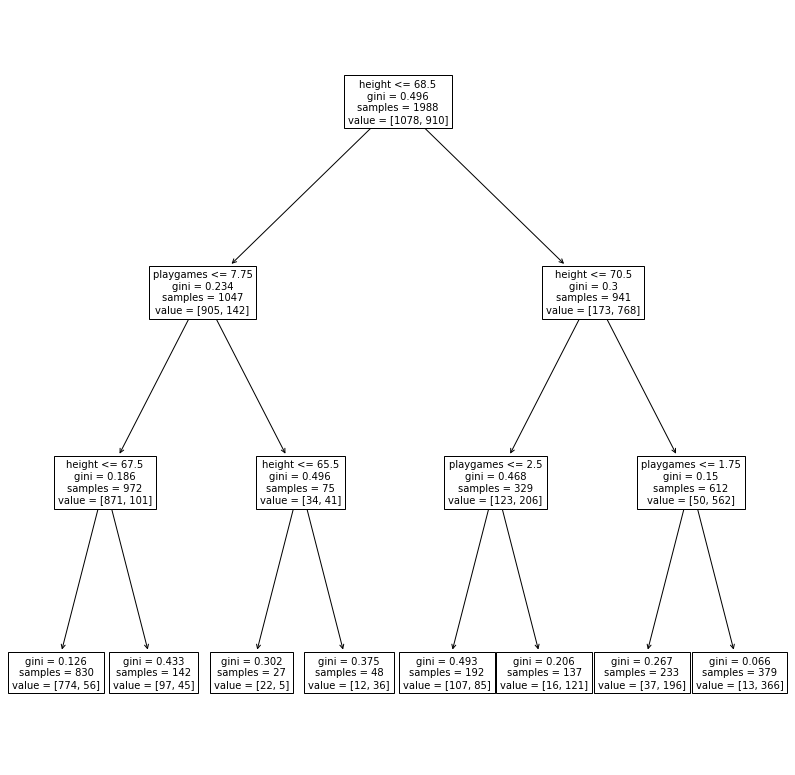

In [352]:
#Option 1 (Recommended Option) - Using `tree.plot_tree`
clf = model
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf, fontsize=10, feature_names=vec.feature_names_); 

**Interpretation of the rule:**

1.For the root node, the height = 68.5 can help us get the best gini index. So finally, we use "height <= 68.5" as a split point and less and equal to 68.5 will go to the left side, larger than 68.5 will go to the right side. The best gini index is 0.496. 

2.In the second layer, the left side node use a new feature "playgames" as its split point, if the playgames time less or equal to 7.75 will go to the left child, otherwise right child.

3.Most of the gini indexs in the last layer will smaller than the parent node.


In [353]:
#Option 2 - Using GraphViz. Visualization is prettier, but additional setup may be required if running on your local machine (although no setup required on Colab)  

from IPython.display import Image  
import pydotplus 
import pydot
from sklearn.externals.six import StringIO


#clf = your classifier
#dotfile = StringIO() 
#tree.export_graphviz(clf, out_file=dotfile,
#                      feature_names=<Names of columns>,  
#                          class_names=['Female', 'Male'],  
#                          filled=True, rounded=True,  
#                          special_characters=True)
#graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
#Image(graph.create_png())


#Ignore the cell below, but do not delete it. It is used to grade the image output of this cell.

In [354]:
# YOUR CODE HERE
# raise NotImplementedError()

---
## Bonus Question (2 points, auto graded)
For each of your leaf nodes, specify the percentage of 'female' rows in that node (out of the total number of rows at that node)


In [355]:
#["female", "male"]
#[774, 56], [97, 45], [22, 5], [12, 36], [107, 85], [16, 121], [37, 196], [13, 366]

774 / (774 + 56)

0.9325301204819277

In [356]:
97 / (97 + 45)

0.6830985915492958

In [357]:
22 / (22 + 5)

0.8148148148148148

In [358]:
12 / (12 + 36)

0.25

In [359]:
107 / (107 + 85)

0.5572916666666666

In [360]:
16 / (16 + 121)

0.11678832116788321

In [361]:
37 / (37 + 196)

0.15879828326180256

In [362]:
13 / (13 + 366)

0.03430079155672823

In [363]:
#The value set in the variable must be array
ratios = [np.array([0.9325301204819277, 0.6830985915492958, 0.8148148148148148, 0.25, 0.5572916666666666, 0.11678832116788321, 0.15879828326180256, 0.03430079155672823])] #Replace 0 with the actual value

# YOUR CODE HERE
# raise NotImplementedError()

In [364]:
#This is an autograded cell, do not edit
print(ratios)

[array([0.93253012, 0.68309859, 0.81481481, 0.25      , 0.55729167,
       0.11678832, 0.15879828, 0.03430079])]
